In [199]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
# Loaded variable 'df' from URI: /Users/ignacio/kaggle/houseprices/data/train.csv
df = pd.read_csv(r"/Users/ignacio/kaggle/houseprices/data/train.csv")


def prepare_data(df: pd.DataFrame) -> pd.DataFrame:
    # Change column type to category for column: 'MSZoning'
    df = df.astype({"MSZoning": "category"})

    # Change column type to category for column: 'MSSubClass'
    df = df.astype({"MSSubClass": "category"})

    # Replace missing values with 0 in column: 'LotFrontage'
    df = df.fillna({"LotFrontage": 0})

    # Filter rows based on column: 'LotArea'
    df = df[df["LotArea"] <= 50000]

    # Change column type to category for column: 'Street'
    df = df.astype({"Street": "category"})

    # Replace missing values with "NA" in column: 'Alley'
    df = df.fillna({"Alley": "NA"})

    # Change column type to category for column: 'LotShape'
    df = df.astype({"LotShape": "category"})

    # Change column type to category for column: 'LandContour'
    df = df.astype({"LandContour": "category"})

    # Change column type to category for column: 'Utilities'
    df = df.astype({"Utilities": "category"})

    # Change column type to category for column: 'LotConfig'
    df = df.astype({"LotConfig": "category"})

    # Change column type to category for column: 'GarageType'
    df = df.fillna({"GarageType": "NA"})
    df = df.astype({"GarageType": "category"})
    # set garageYrBlt missing to 0
    df = df.fillna({"GarageYrBlt": 0})

    df = df.astype({"LandSlope": "category"})

    df = df.astype({"Neighborhood": "category"})

    df = df.astype({"Condition1": "category"})

    df = df.astype({"Condition2": "category"})

    df = df.astype({"BldgType": "category"})

    df = df.astype({"HouseStyle": "category"})

    df = df.astype({"OverallQual": "int8"})

    df = df.astype({"OverallCond": "int8"})

    # introduce year build from columns 'YearBuilt' parse as time
    df["x_YearBuilt"] = pd.to_datetime(df["YearBuilt"], format="%Y")
    # MasVnrArea
    df = df.fillna({"MasVnrArea": 0})
    # drop where MasVnrArea > 720
    df = df[df["MasVnrArea"] <= 720]
    df["x_YearRemodAdd"] = pd.to_datetime(df["YearRemodAdd"], format="%Y")

    df = df.astype({"RoofMatl": "category"})

    df = df.astype({"Exterior1st": "category"})

    df = df.astype({"Exterior2nd": "category"})

    # set missing values in 'MasVnrType' to "None"
    df = df.fillna({"MasVnrType": "None"})
    df = df.astype({"MasVnrType": "category"})

    df = df.astype({"ExterQual": "category"})
    df = df.astype({"ExterCond": "category"})

    df = df.astype({"Foundation": "category"})

    # BsmtFinType1    31
    df = df.fillna({"BsmtFinType1": "NA"})
    df = df.astype({"BsmtFinType1": "category"})
    # GarageType      59
    # df = df.fillna({"GarageType": "NA"})
    df = df.astype({"GarageType": "category"})
    # GarageCond      59
    df = df.fillna({"GarageCond": "NA"})
    df = df.astype({"GarageCond": "category"})
    # set missing values in 'BsmtQual' to "NA"
    df = df.fillna({"BsmtQual": "NA"})
    df = df.astype({"BsmtQual": "category"})

    df = df.fillna({"BsmtCond": "NA"})
    df = df.astype({"BsmtCond": "category"})

    df = df.fillna({"BsmtExposure": "NA"})
    df = df.astype({"BsmtExposure": "category"})

    df = df.fillna({"BsmtFinType2": "NA"})
    df = df.astype({"BsmtFinType2": "category"})

    df = df.astype({"Heating": "category"})
    df = df.astype({"HeatingQC": "category"})

    # drop if electrical is missing
    df = df.dropna(subset=["Electrical"])

    # drop if LowQualFinSF > 60
    df = df[df["LowQualFinSF"] <= 60]

    df = df.astype({"KitchenQual": "category"})

    # fill FireplaceQu missing with "NA"
    df = df.fillna({"FireplaceQu": "NA"})
    df = df.astype({"FireplaceQu": "category"})

    # set garageYrBlt to timestamp based on year
    df["x_GarageYrBlt"] = pd.to_datetime(
        df["GarageYrBlt"], format="%Y", errors="coerce"
    )

    # filld x_GarageYrBlt missing with 1900-01-01
    df["x_GarageYrBlt"] = df["x_GarageYrBlt"].fillna(
        pd.to_datetime("1900-01-01")
    )

    df = df.fillna({"GarageFinish": "NA"})
    df = df.astype({"GarageFinish": "category"})

    df = df.fillna({"GarageQual": "NA"})
    df = df.astype({"GarageQual": "category"})

    # pavedDrive
    df = df.astype({"PavedDrive": "category"})

    # drop if OpenPorchSF > 330
    df = df[df["OpenPorchSF"] <= 330]

    # drop if EnclosedPorch > 300
    df = df[df["EnclosedPorch"] <= 300]

    # drop if 3SsnPorch > 60
    df = df[df["3SsnPorch"] <= 60]

    # drop if ScreenPorch > 300
    df = df[df["ScreenPorch"] <= 300]

    # drop if poolArea > 40
    df = df[df["PoolArea"] <= 40]

    # PoolQC missing to "NA"
    df = df.fillna({"PoolQC": "NA"})
    df = df.astype({"PoolQC": "category"})

    # Fence missing to "NA"
    df = df.fillna({"Fence": "NA"})
    df = df.astype({"Fence": "category"})

    # drop column 'MiscFeature'
    df = df.drop(columns=["MiscFeature"])

    # drop MiscVal
    df = df.drop(columns=["MiscVal"])

    # create dateSold from YrSold and MoSold
    df["dateSold"] = pd.to_datetime(
        df["YrSold"].astype(str) + "-" + df["MoSold"].astype(str) + "-01",
        format="%Y-%m-%d",
    )

    # change SaleType to category
    df = df.astype({"SaleType": "category"})

    df = df.astype({"SaleCondition": "category"})

    # drop if salePrice > 440000
    df = df[df["SalePrice"] <= 440000]
    return df

In [201]:
df = prepare_data(df)

In [202]:
df.isnull().sum()

Id                0
MSSubClass        0
LotFrontage       0
LotArea           0
Street            0
                 ..
SalePrice         0
x_YearBuilt       0
x_YearRemodAdd    0
x_GarageYrBlt     0
dateSold          0
Length: 82, dtype: int64

<Axes: >

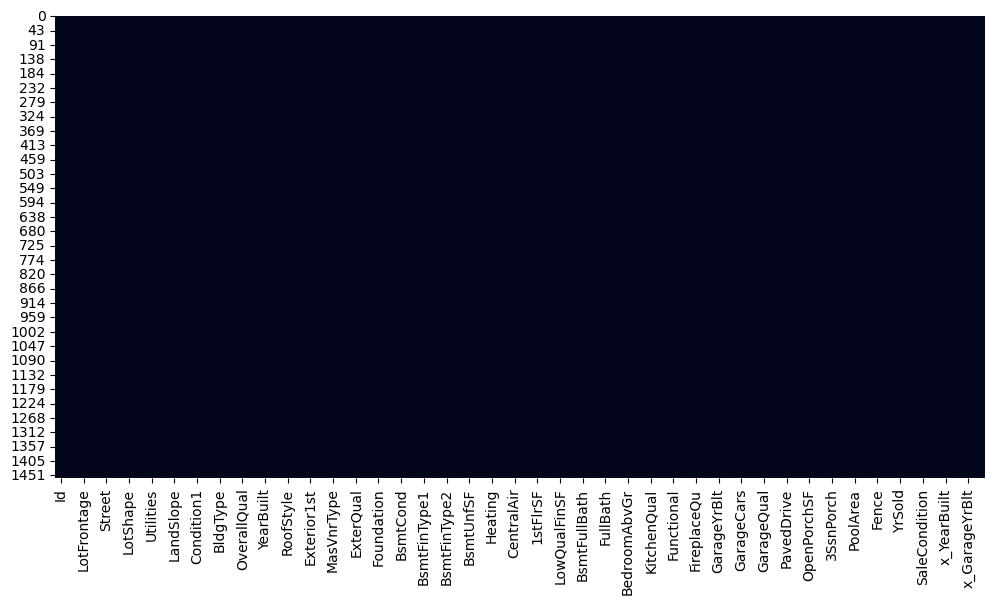

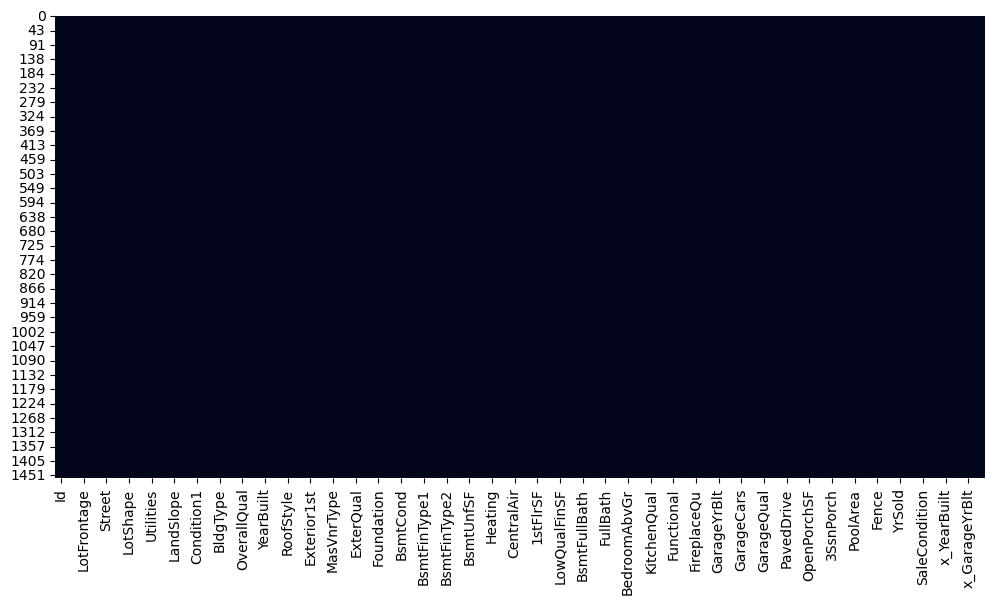

In [203]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)

In [204]:
X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [205]:
# show only columns with missing values in X_train
# X_train.isnull().sum()[X_train.isnull().sum() > 0]

In [206]:
# build a linear regression model to predict SalePrice


model = LinearRegression()
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Pave'

In [ ]:
# show r2 score
r2_score = model.score(X_test, y_test)
print(f"R2 Score: {r2_score}")


R2 Score: 0.8373585432487907


In [ ]:
# show model summary
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     253.3
Date:                Sat, 25 Oct 2025   Prob (F-statistic):               0.00
Time:                        22:07:37   Log-Likelihood:                -12428.
No. Observations:                1082   AIC:                         2.492e+04
Df Residuals:                    1050   BIC:                         2.508e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.187e+06   1.14e+06     -1.043      0.297   -3.42e+06    1.05e+06
LotFrontage     101.0410     22.859      4.420      0.000      56.186     145.896
LotArea           1.1618      0.200      5.796      0.000       0.768       1.555
OverallQual    1.389e+04    966.400     14.374      0.000     1.2e+04    1.58e+04
OverallCond    4978.4559    834.413      5.966      0.000    3341.148    6615.763
YearBuilt       347.2865     50.467      6.881      0.000     248.259     446.314
YearRemodAdd    186.7076     53.601      3.483      0.001      81.531     291.884
MasVnrArea       15.3413      5.715      2.685      0.007       4.128      26.555
BsmtFinSF1       20.8430      2.168      9.615      0.000      16.589      25.097
BsmtFinSF2       -2.2108      3.666     -0.603      0.547      -9.405       4.984
BsmtUnfSF        -0.4048      1.922     -0.211      0.833      -4.177       3.367
TotalBsmtSF      18.2274      2.797      6.517      0.000      12.739      23.715
1stFlrSF         77.2550    116.909      0.661      0.509    -152.147     306.657
2ndFlrSF         77.7962    116.503      0.668      0.504    -150.810     306.402
LowQualFinSF   -179.9072    349.518     -0.515      0.607    -865.740     505.926
GrLivArea       -24.8560    116.187     -0.214      0.831    -252.840     203.128
BsmtFullBath    718.7761   2114.921      0.340      0.734   -3431.176    4868.728
BsmtHalfBath  -7111.5837   3345.437     -2.126      0.034   -1.37e+04    -547.080
FullBath       1061.8459   2333.414      0.455      0.649   -3516.839    5640.531
HalfBath      -2166.3928   2181.600     -0.993      0.321   -6447.184    2114.399
BedroomAbvGr  -7985.2997   1413.857     -5.648      0.000   -1.08e+04   -5210.992
KitchenAbvGr  -2.174e+04   3836.939     -5.666      0.000   -2.93e+04   -1.42e+04
TotRmsAbvGrd   2807.7206   1044.573      2.688      0.007     758.032    4857.409
Fireplaces     3851.3177   1412.873      2.726      0.007    1078.941    6623.694
GarageYrBlt     -10.7439      2.146     -5.007      0.000     -14.954      -6.533
GarageCars     6626.5173   2415.155      2.744      0.006    1887.437    1.14e+04
GarageArea       19.1339      8.024      2.385      0.017       3.389      34.878
WoodDeckSF       21.6289      6.479      3.338      0.001       8.915      34.342
OpenPorchSF      17.9646     13.967      1.286      0.199      -9.442      45.371
EnclosedPorch    19.0872     13.643      1.399      0.162      -7.684      45.859
3SsnPorch      -260.8818   1047.464     -0.249      0.803   -2316.243    1794.479
ScreenPorch       5.4605     15.679      0.348      0.728     -25.306      36.226
PoolArea               0          0        nan        nan           0           0
MoSold          237.8392    278.733      0.853      0.394    -309.098     784.777
YrSold           45.7477    566.520      0.081   

In [ ]:
# load test data
df_test = pd.read_csv("data/test.csv")
# df_test = prepare_data(df_test)
# make predictions on test data
X_test_final = df_test.select_dtypes(include=["number"]).drop(columns=["Id"])

predictions = model.predict(X_test_final)
# output predictions to csv
output = pd.DataFrame({"Id": df_test.Id, "SalePrice": predictions})
output.to_csv("data/submission.csv", index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- MSSubClass
- MiscVal
